Gaussian: Acceptance rate = 0.48
Uniform: Acceptance rate = 0.59


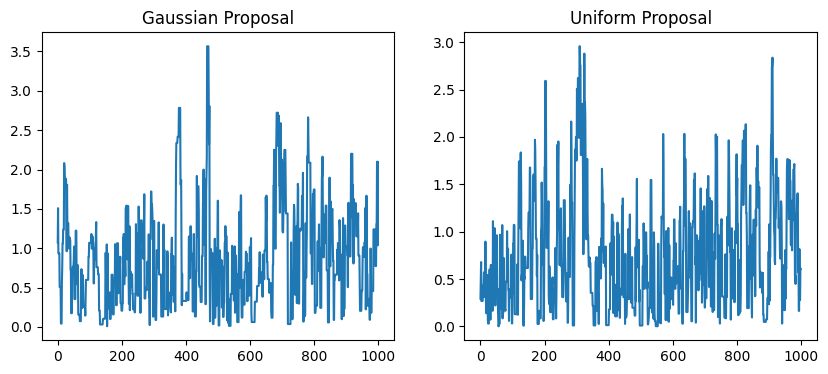

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def target_posterior(w):
    return np.exp(-w**2 / 2) if w >= 0 else 0

# Metropolis-Hastings with Gaussian proposal
def mh_gaussian(n_iter, sigma):
    samples = np.zeros(n_iter)
    w = 1.0  # Initial value
    accepted = 0
    for t in range(n_iter):
        w_star = np.random.normal(w, sigma)
        alpha = min(1, target_posterior(w_star) / target_posterior(w))
        u = np.random.uniform()
        if u <= alpha:
            w = w_star
            accepted += 1
        samples[t] = w
    print(f"Gaussian: Acceptance rate = {accepted/n_iter:.2f}")
    return samples

# Metropolis-Hastings with Uniform proposal
def mh_uniform(n_iter, delta):
    samples = np.zeros(n_iter)
    w = 1.0
    accepted = 0
    for t in range(n_iter):
        w_star = np.random.uniform(w - delta, w + delta)
        alpha = min(1, target_posterior(w_star) / target_posterior(w))
        u = np.random.uniform()
        if u <= alpha:
            w = w_star
            accepted += 1
        samples[t] = w
    print(f"Uniform: Acceptance rate = {accepted/n_iter:.2f}")
    return samples

# Run and plot
samples_gaussian = mh_gaussian(1000, 1)
samples_uniform = mh_uniform(1000, 1)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(samples_gaussian)
plt.title("Gaussian Proposal")
plt.subplot(122)
plt.plot(samples_uniform)
plt.title("Uniform Proposal")
plt.show()